In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns



In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

In [ ]:
ibov=web.get_data_yahoo('ITSA4.SA')

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-24,8.85,9.16,8.80,9.03,9.03,26227400
2020-09-25,9.00,9.07,8.93,9.02,9.02,14201800
2020-09-28,9.15,9.32,8.87,8.97,8.97,30941200
2020-09-29,8.98,8.99,8.80,8.82,8.82,25097100
2020-09-30,8.88,8.93,8.80,8.80,8.80,27176700
2020-10-01,8.85,8.92,8.76,8.90,8.90,22780600
2020-10-02,8.87,9.17,8.84,8.92,8.92,25838900
2020-10-05,8.93,9.01,8.79,8.96,8.96,30884200
2020-10-06,9.05,9.14,8.90,8.98,8.98,26893600


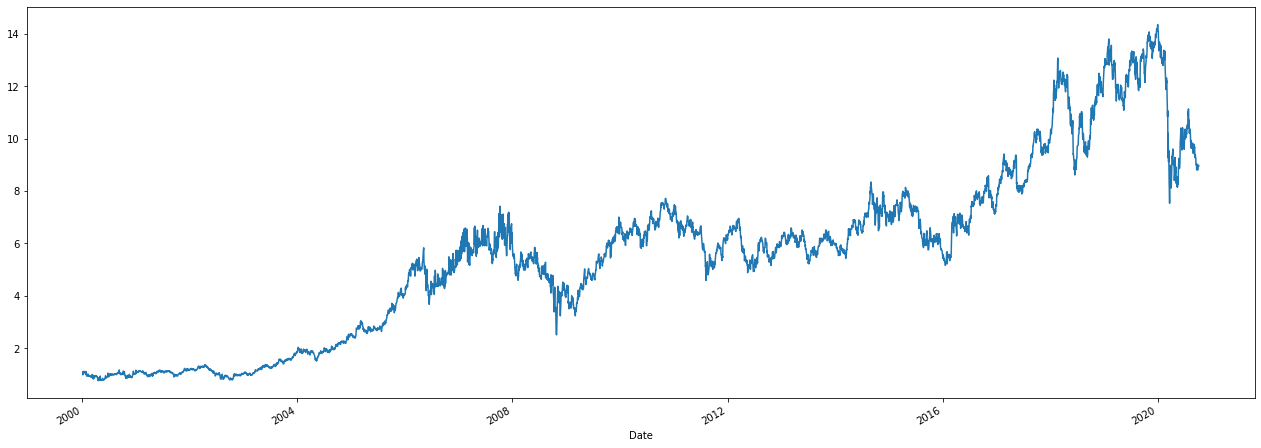

In [ ]:
ibov['Close'].plot(figsize=(22,8))

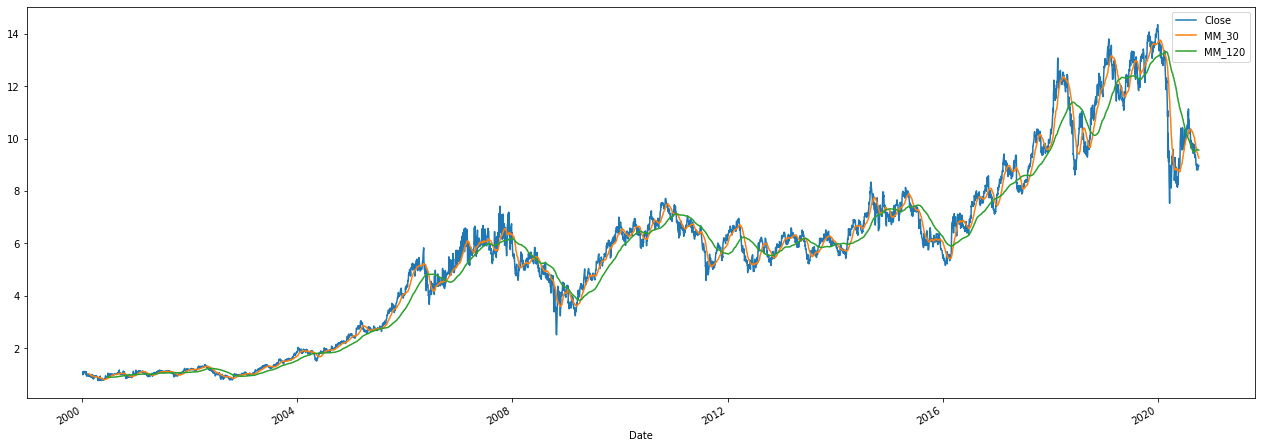

In [ ]:
# media movel
ibov['Close'].plot(figsize=(22,8))
ibov['Close'].rolling(30).mean().plot(label='MM_30')
ibov['Close'].rolling(120).mean().plot(label='MM_120')
plt.legend()

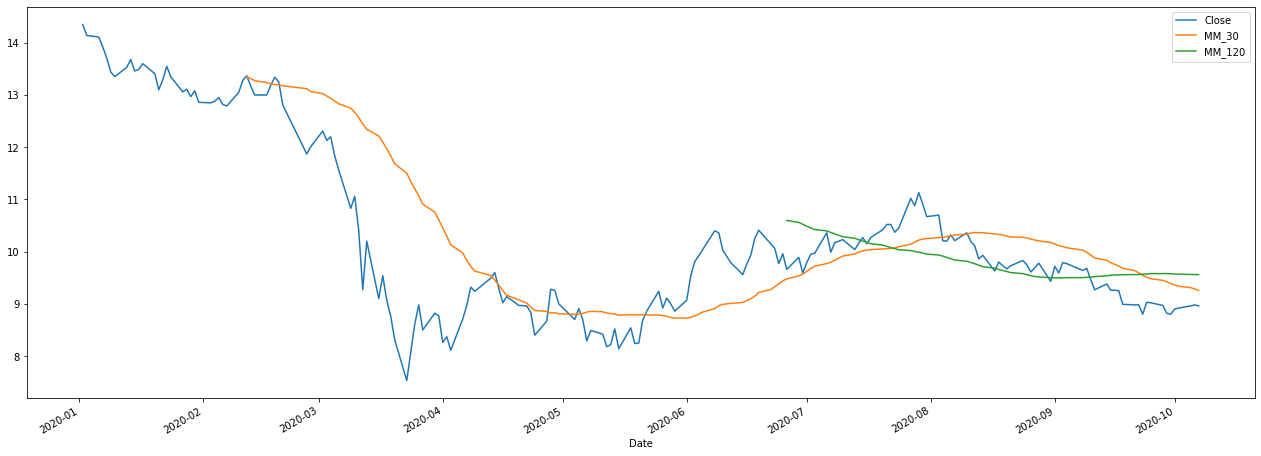

In [ ]:
# media movel para o ano de 2020
ibov_parcial=ibov[ibov.index.year==2020]
ibov_parcial['Close'].plot(figsize=(22,8))
ibov_parcial['Close'].rolling(30).mean().plot(label='MM_30')
ibov_parcial['Close'].rolling(120).mean().plot(label='MM_120')
plt.legend()

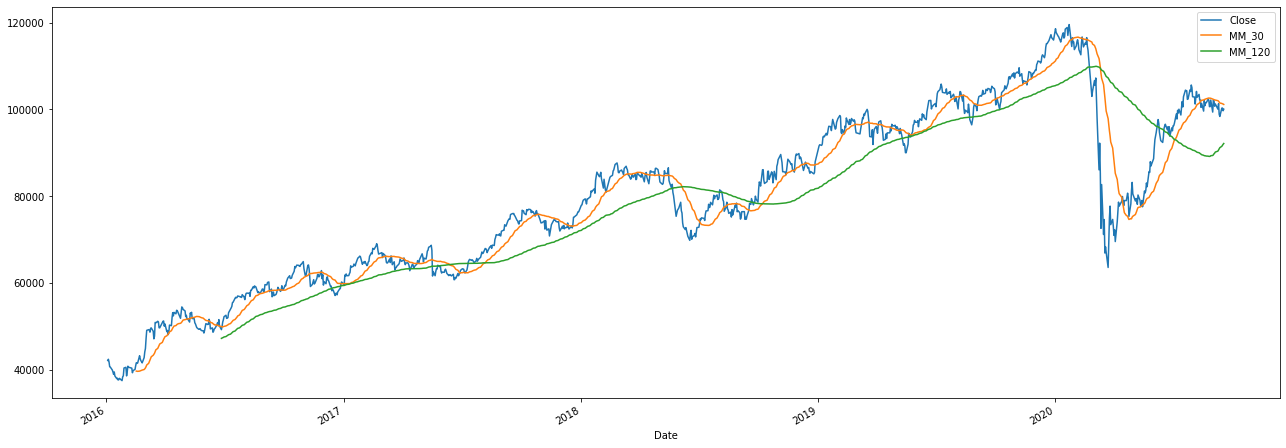

In [ ]:
# media movel para os anos entre 2016 e 2020
ibov_parcial=ibov[(ibov.index.year>=2016)&(ibov.index.year<=2020)]
ibov_parcial['Close'].plot(figsize=(22,8))
ibov_parcial['Close'].rolling(30).mean().plot(label='MM_30')
ibov_parcial['Close'].rolling(120).mean().plot(label='MM_120')
plt.legend()

In [ ]:
# ultimos 5 anos de ações da vale
ibov_vale=web.get_data_yahoo('VALE3.SA',start='2015-01-01', end='2020-01-30')

[*********************100%***********************]  1 of 1 completed


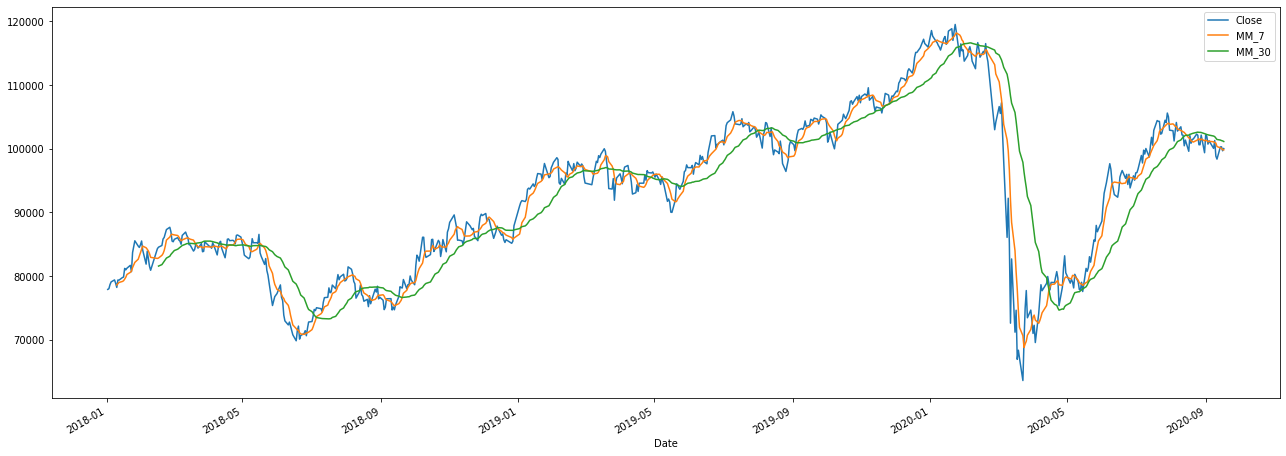

In [ ]:
ibov_vale=ibov[(ibov.index.year>=2018)]
ibov_vale['Close'].plot(figsize=(22,8))
ibov_vale['Close'].rolling(7).mean().plot(label='MM_7')
ibov_vale['Close'].rolling(30).mean().plot(label='MM_30')
plt.legend()

In [ ]:
# baixando dois ativos
ativos =['^BVSP', 'USDBRL=X']
carteira=web.get_data_yahoo(ativos,start='2010-01-01')['Close']

[*********************100%***********************]  2 of 2 completed


In [ ]:
carteira

,USDBRL=X,^BVSP
Date,,
2010-01-04,1.7190,70045.000000
2010-01-05,1.7370,70240.000000
2010-01-06,1.7315,70729.000000
2010-01-07,1.7389,70451.000000
2010-01-08,1.7320,70263.000000
...,...,...
2020-09-11,5.3205,98363.000000
2020-09-14,5.3162,100275.000000
2020-09-15,5.2683,100298.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9e506748>,
      dtype=object)

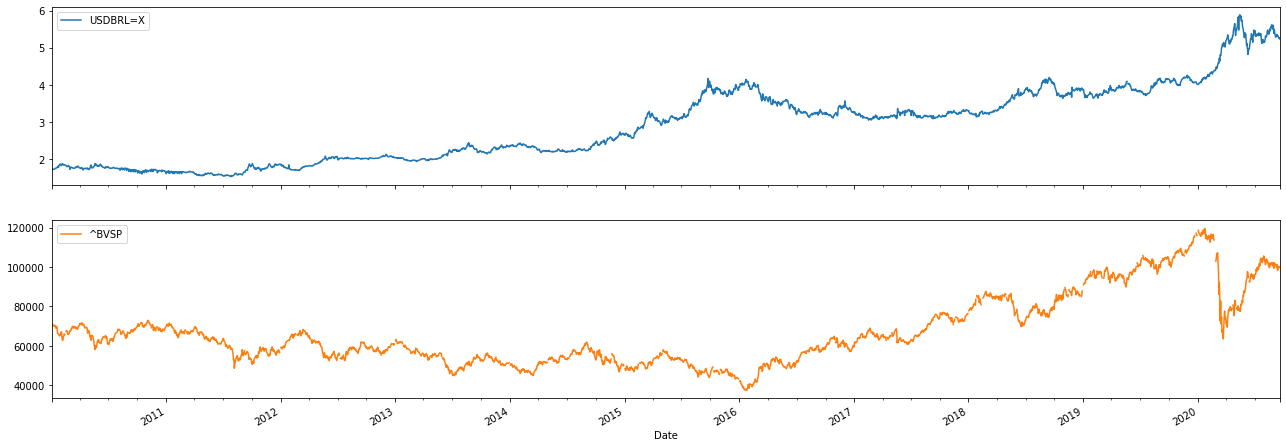

In [ ]:
carteira.plot(subplots=True,figsize=(22,8))

In [ ]:
# removendo dados nulos
carteira=carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2010-01-04,1.7190,70045.000000
2010-01-05,1.7370,70240.000000
2010-01-06,1.7315,70729.000000
2010-01-07,1.7389,70451.000000
2010-01-08,1.7320,70263.000000
...,...,...
2020-09-11,5.3205,98363.000000
2020-09-14,5.3162,100275.000000
2020-09-15,5.2683,100298.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c91fe06d8>,
      dtype=object)

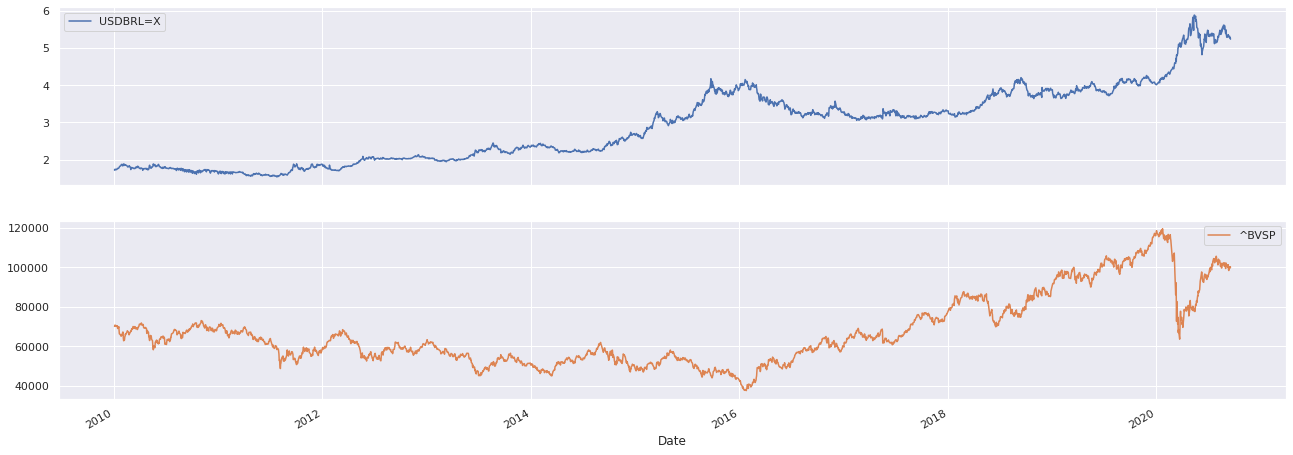

In [ ]:
sns.set()
carteira.plot(subplots=True,figsize=(22,8))

In [ ]:
carteira.corr()

,USDBRL=X,^BVSP
USDBRL=X,1.000000,0.532826
^BVSP,0.532826,1.000000


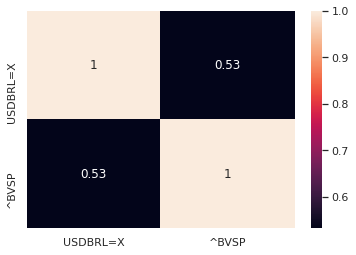

In [ ]:
sns.heatmap(carteira.corr(),annot=True)

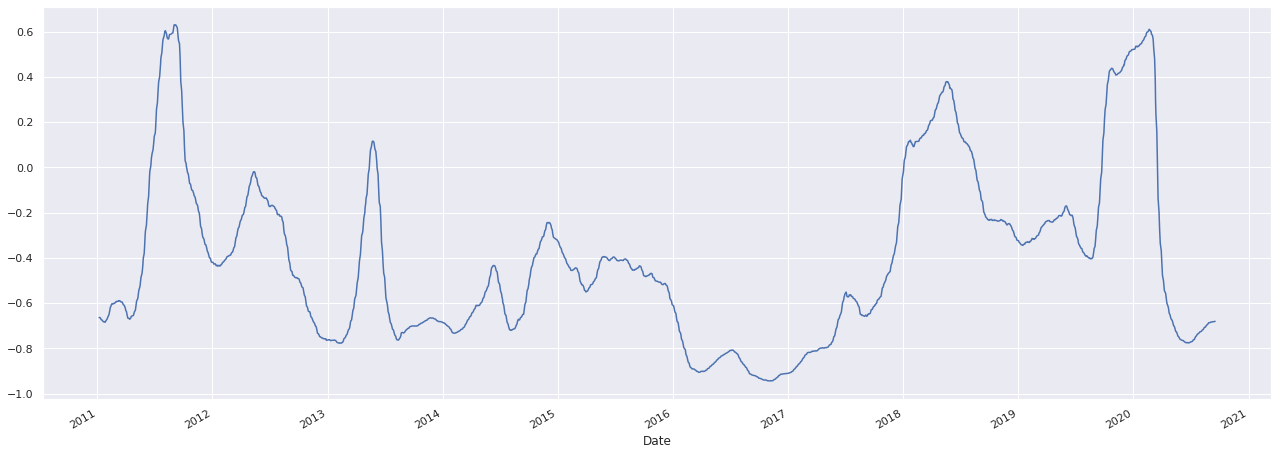

In [ ]:
carteira['USDBRL=X'].rolling(252).corr(carteira["^BVSP"]).plot(figsize=(22,8))